In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df['Virus Present'].unique()

array([0, 1], dtype=int64)

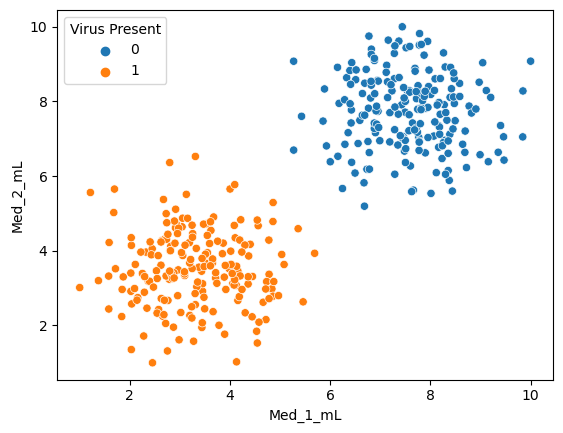

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
plt.show()

In [6]:
x=df[['Med_1_mL','Med_2_mL']]
y=df['Virus Present']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

**support vector machines**

In [8]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [9]:
ypred_train=svc_model.predict(x_train)
ypred_test=svc_model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 1.0
test accuracy: 1.0


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc_model,x,y,cv=5)
print(score)
score.mean()

[1. 1. 1. 1. 1.]


1.0

**hyperparameter tuning**

In [14]:
from sklearn.model_selection import GridSearchCV

estimator=SVC()
param_grid={'C':[0.01,0.1,1,2,3,5,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [16]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [18]:
svc_model=SVC(kernel='linear',C=0.01)
svc_model.fit(x_train,y_train)

ypred_train=svc_model.predict(x_train)
ypred_test=svc_model.predict(x_test)

print('train accuracy:',accuracy_score(y_train,ypred_train))
print('train accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 1.0
train accuracy: 1.0
